## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimensionm

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

-- **No Missing Values** 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
## Check Duplicate Recoard
df.duplicated().sum()

0

-- **NO Duplicate Recoadrds**

In [7]:
## Data Visualization Libraries for Data Analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Identify columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [9]:
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


### EDA of Numerical Column

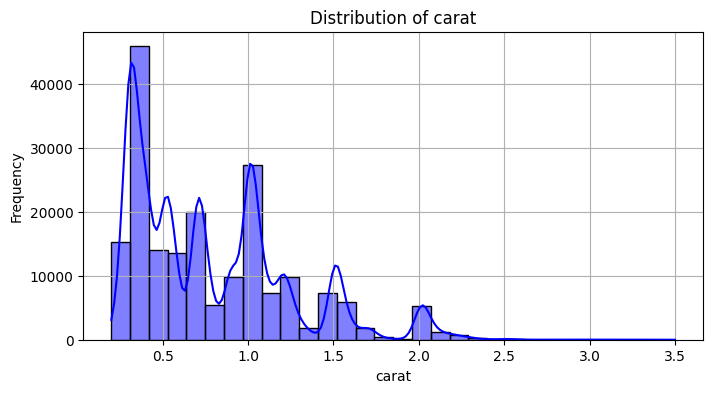

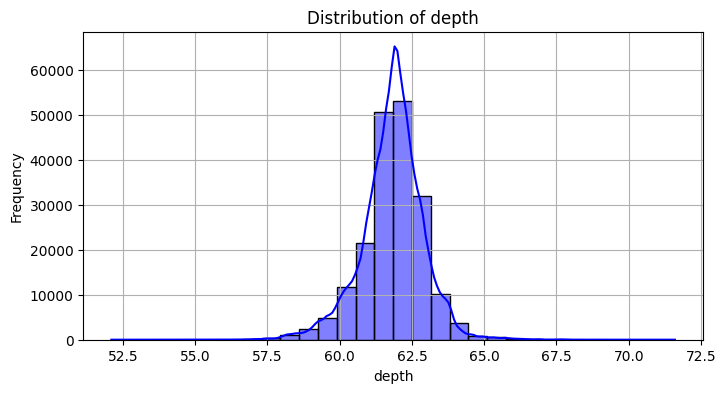

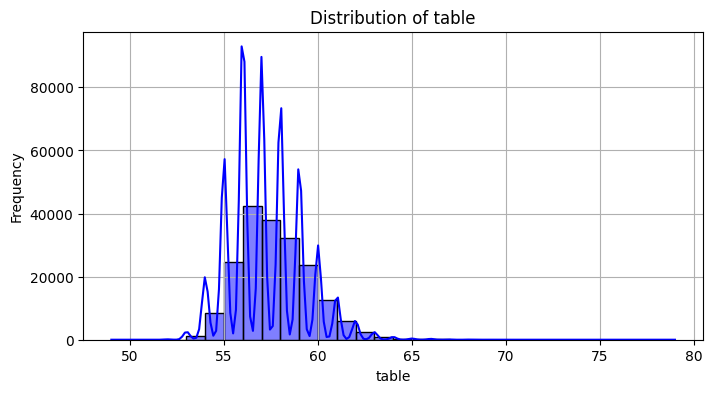

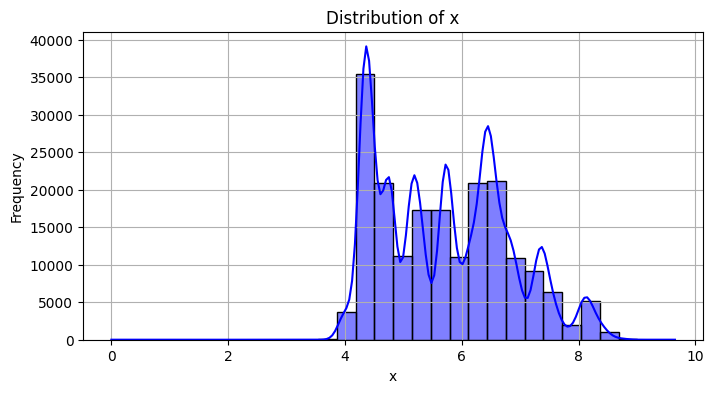

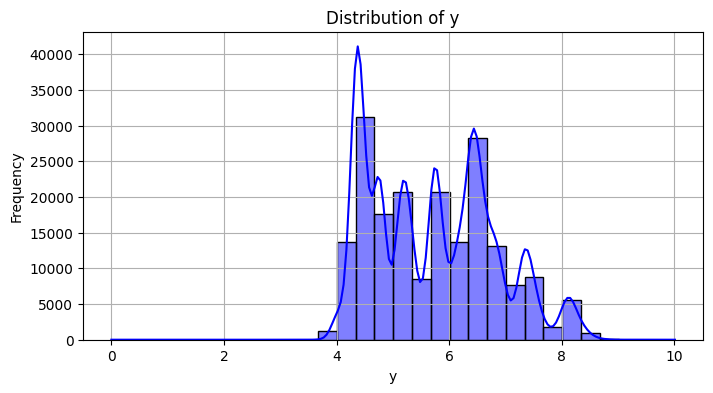

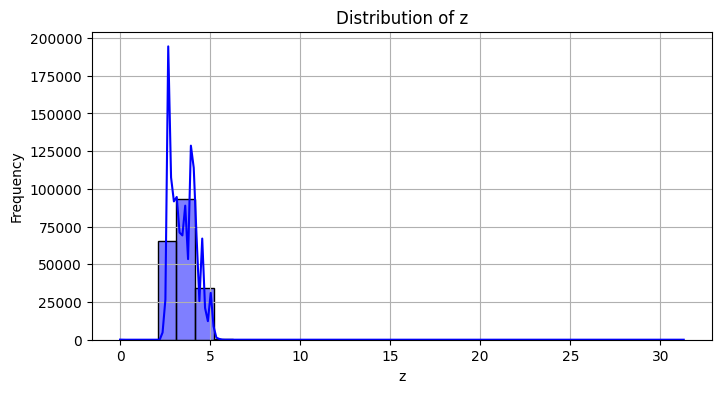

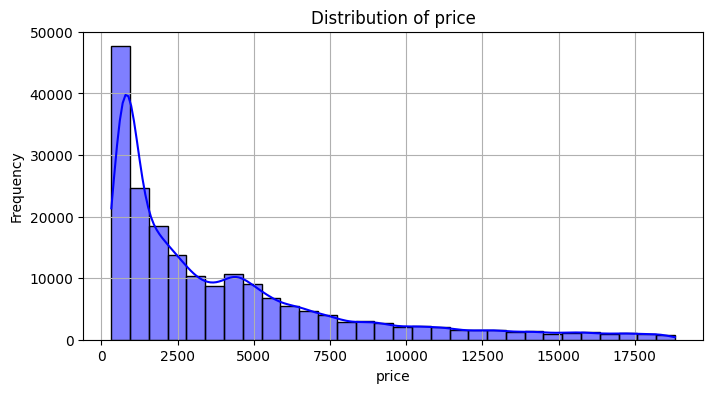

In [10]:
# Plot distributions for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

#### Calculate basic statistical metrics:
- to understand the spread, central tendency, and variability of numerical columns.

In [11]:
# Summary statistics for numerical columns
summary_stats = df[numerical_columns].describe().transpose()
summary_stats['skew'] = df[numerical_columns].skew()
summary_stats['kurtosis'] = df[numerical_columns].kurtosis()

print("Summary Statistics for Numerical Columns:")
print(summary_stats)

Summary Statistics for Numerical Columns:
          count         mean          std    min     25%      50%      75%  \
carat  193573.0     0.790688     0.462688    0.2    0.40     0.70     1.03   
depth  193573.0    61.820574     1.081704   52.1   61.30    61.90    62.40   
table  193573.0    57.227675     1.918844   49.0   56.00    57.00    58.00   
x      193573.0     5.715312     1.109422    0.0    4.70     5.70     6.51   
y      193573.0     5.720094     1.102333    0.0    4.71     5.72     6.51   
z      193573.0     3.534246     0.688922    0.0    2.90     3.53     4.03   
price  193573.0  3969.155414  4034.374138  326.0  951.00  2401.00  5408.00   

            max      skew   kurtosis  
carat      3.50  0.995135   0.537398  
depth     71.60 -0.276382   2.477041  
table     79.00  0.619062   0.810180  
x          9.65  0.361050  -0.801006  
y         10.01  0.356758  -0.810668  
z         31.30  0.685671  12.818313  
price  18818.00  1.605581   2.106914  


### **Summary of Basic Statistical Metrics for Diamond Price Prediction**

The summary statistics for the numerical columns provide insights into the **distribution, central tendency**, and **variability** of the data, which is crucial for understanding the spread of values in features like `carat`, `price`, and diamond dimensions (`x`, `y`, `z`).

---

### **Key Metrics:**
1. **Central Tendency (Mean, Median)**
   - **Carat**: Mean = 0.79, Median = 0.70
   - **Price**: Mean = 3969.16, Median = 2401.00 (skewed distribution, with a high mean indicating some very expensive diamonds).
   - **Depth**: Mean = 61.82, Median = 61.90 (close values suggest near-normal distribution).
   - **Table**: Mean = 57.23, Median = 57.00.
   - **Dimensions (x, y, z)**: Mean and Median are close, showing symmetry in distribution.

2. **Spread (Range, Standard Deviation)**
   - **Carat**: Max = 3.50, Std = 0.46 (high variability with small and large diamonds).
   - **Price**: Max = 18,818, Std = 4034.37 (very high variability, with extreme values likely contributing to the large standard deviation).
   - **Depth**: Max = 71.60, Std = 1.08.
   - **Dimensions (x, y, z)**: `x` and `y` have similar ranges and standard deviations, with values around 5.7.
   
3. **Skewness**
   - **Carat**: Skew = 0.995, indicating slight right-skew (more smaller diamonds).
   - **Price**: Skew = 1.61, indicating significant right-skew (most diamonds are priced low, with a few expensive ones).
   - **Depth**: Skew = -0.28, indicating slight left skew.
   - **Dimensions (x, y, z)**: All have mild positive skew, especially `z` with skew = 0.69.

4. **Kurtosis** (Tendency for extreme values)
   - **Price**: Kurtosis = 2.11, indicating a heavy-tailed distribution, meaning that extreme price values (outliers) are present.
   - **Carat**: Kurtosis = 0.54, indicating a relatively normal distribution with fewer outliers.
   - **Depth**: Kurtosis = 2.48, indicating a somewhat heavier tail than normal.
   - **Dimensions**: `x`, `y` have negative kurtosis, suggesting a more uniform distribution.

---

### **Summary Insights:**
- **Carat and Price**: Both are **right-skewed**, with `carat` showing a higher concentration of smaller diamonds, and `price` showing the same for lower-priced diamonds.
- **Depth, Table, and Dimensions**: Have relatively **symmetric distributions** with moderate variations.
- **Price Distribution**: Highly skewed and has **heavy tails**, indicating that while most diamonds are low-priced, there are a few high-priced outliers that will significantly affect model predictions.
- **Dimension Variables**: Generally have small skew and close-to-normal distributions, making them relatively stable for modeling.

---

**Action**: 
- **Log transformations** could help handle skewness, especially for `carat` and `price` to improve model performance. 
- **Price** has heavy tails, so **outlier detection** methods (e.g., using IQR or Z-score) may help in identifying extreme values.

## Distribution and Outliers
- Boxplots to identify outliers.
- Histograms and KDE plots to understand data distribution.

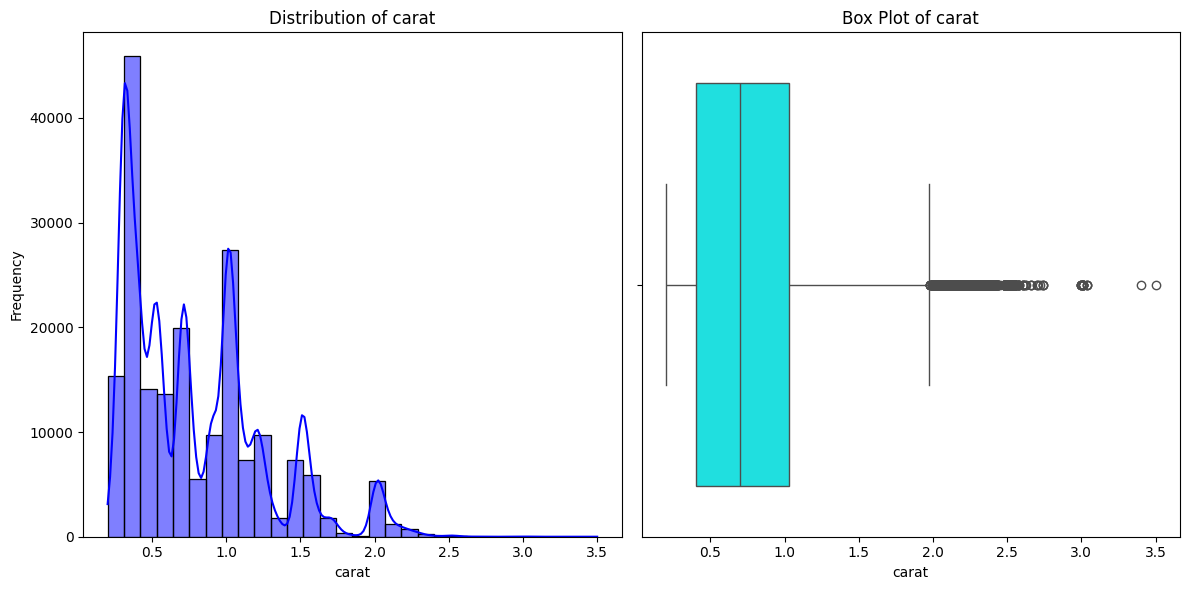

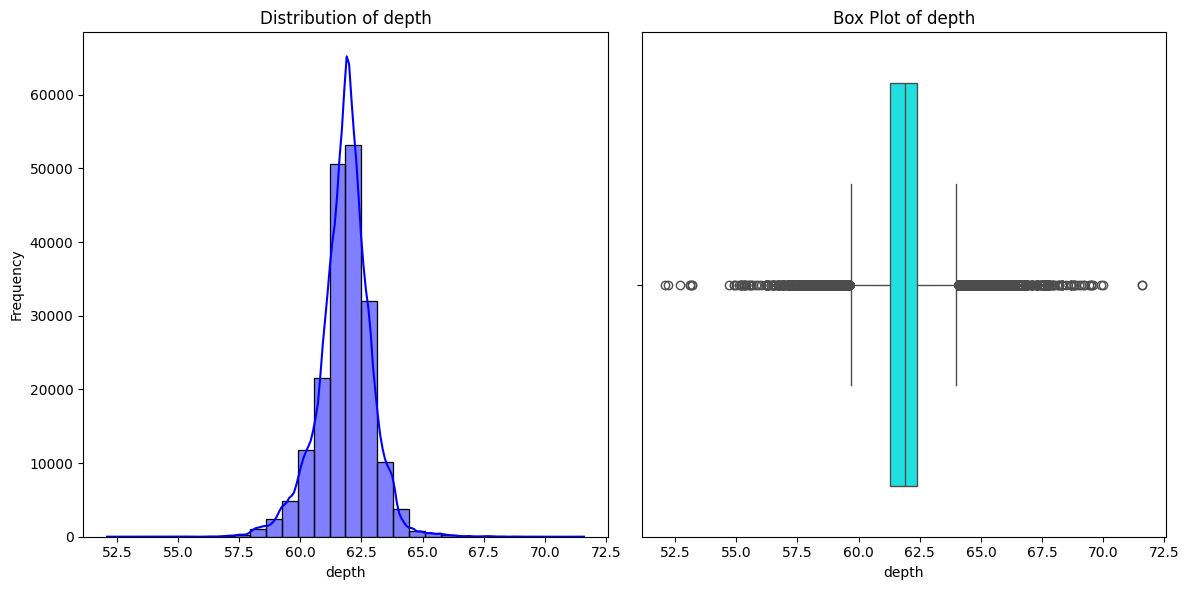

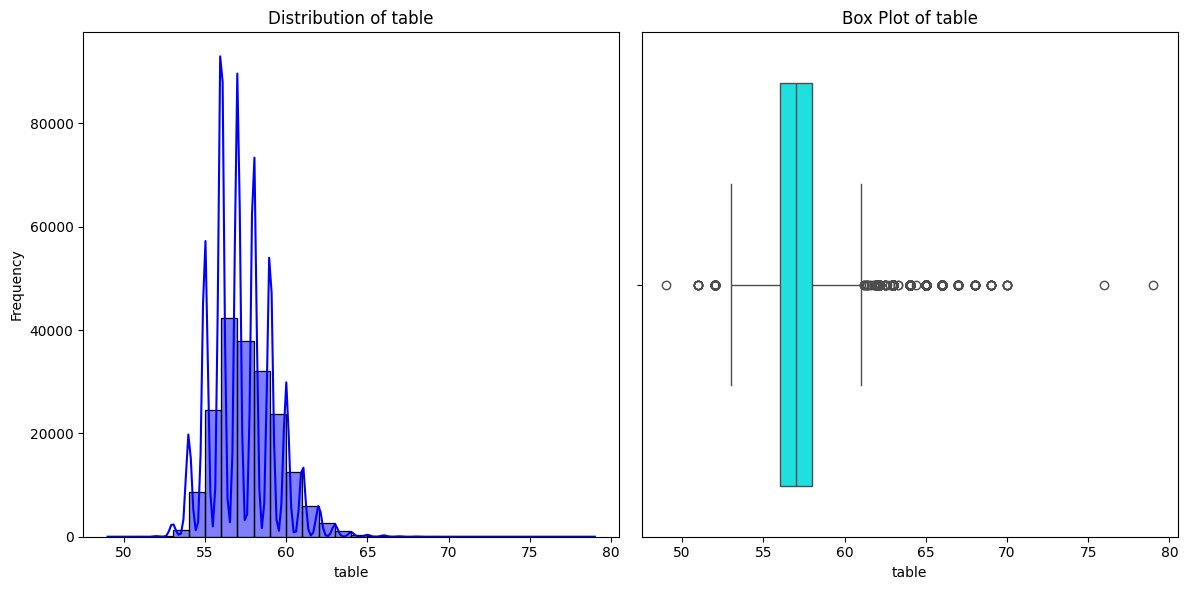

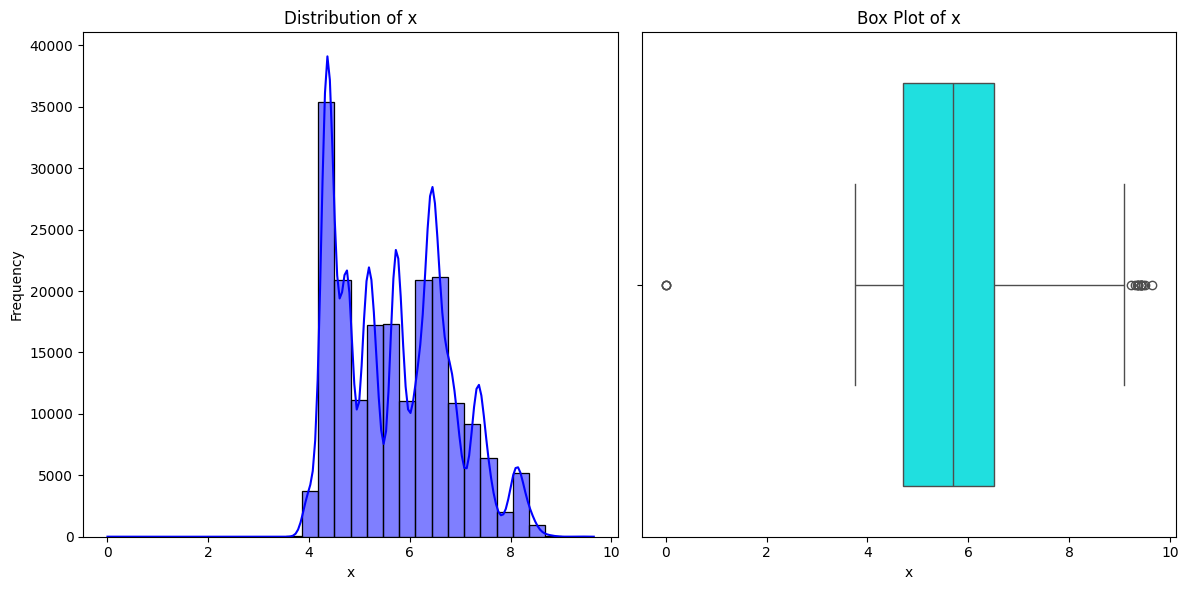

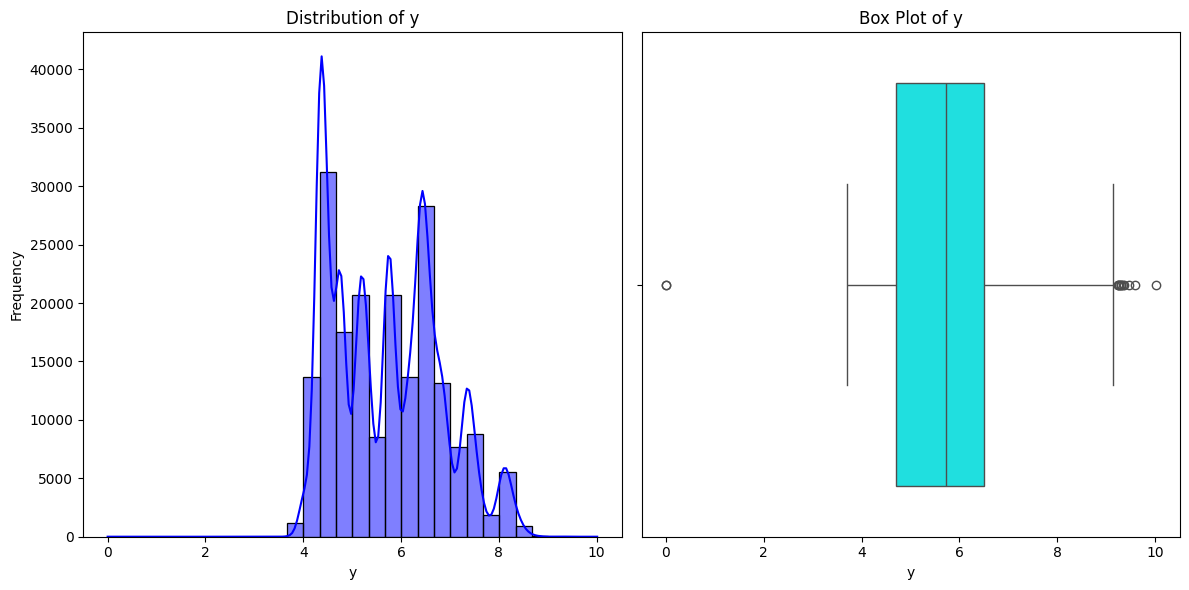

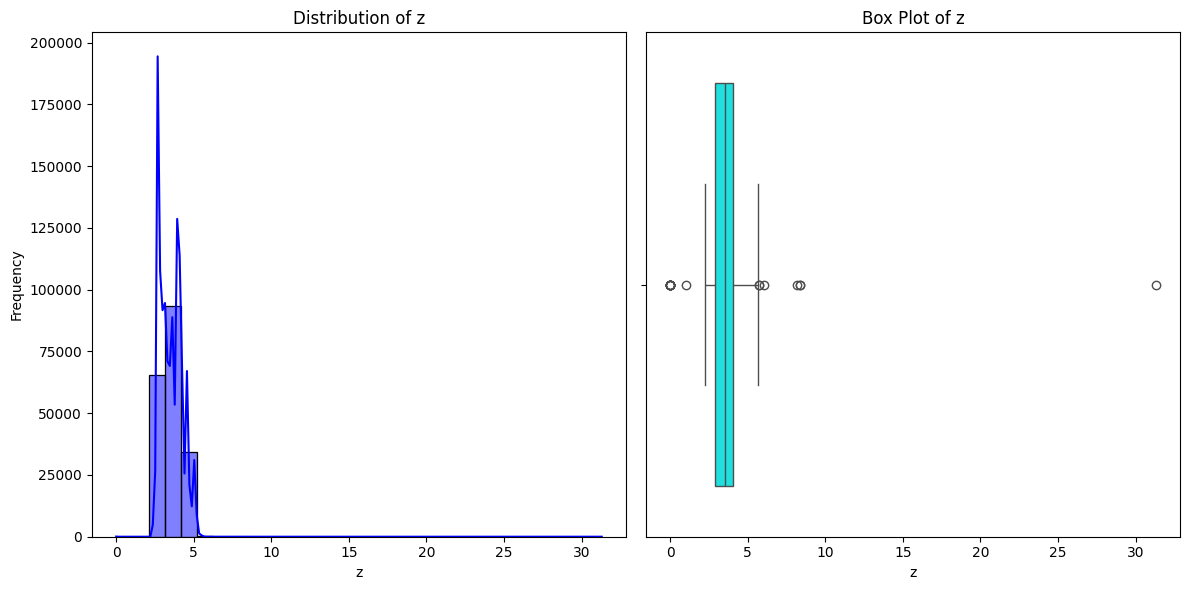

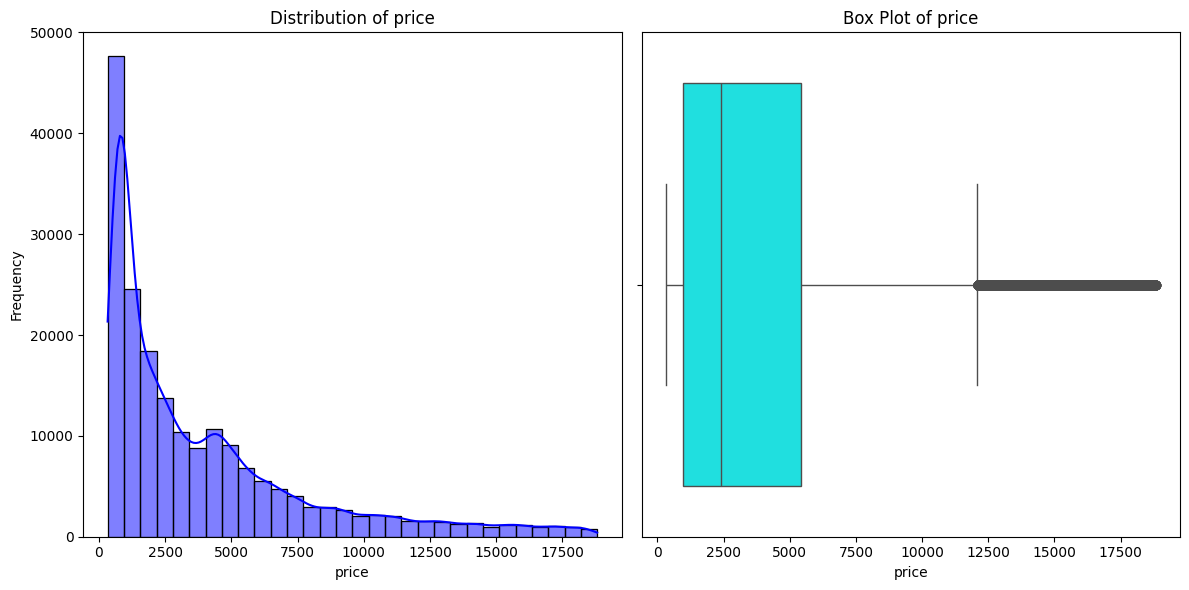

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='cyan')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### **Summary of Distribution and Outliers for Diamond Price Prediction Numerical Columns**

---

### **1. Distribution Analysis**
- **Histograms and KDE Plots**:
  - **Price**: Likely to have a right-skewed distribution due to luxury pricing, with most diamonds priced in lower ranges and fewer in the high range.
  - **Carat Weight**: Often right-skewed; smaller carat diamonds are more common, with fewer very large diamonds.
  - **Depth**: Typically follows a normal distribution, as standard depth ranges are industry-regulated.
  - **Table**: May have a slightly peaked distribution, with most values clustering around industry-standard table sizes.
  - **Dimensions (x, y, z)**:
    - Distributions often reflect physical constraints of diamond cuts, with fewer outliers in these columns.

---

### **2. Outlier Analysis**
- **Boxplots**:
  - **Price**: Significant outliers in high-value ranges, representing luxury or rare diamonds.
  - **Carat Weight**: Outliers likely include exceptionally large diamonds, which are rare and highly valuable.
  - **Depth & Table**: Few outliers expected as these follow standard industry guidelines. Extreme values may indicate data-entry errors or irregularly cut diamonds.
  - **Dimensions (x, y, z)**:
    - Outliers in these columns may indicate measurement errors or unique custom shapes.

---


### **Actionable Insights:**
1. **Skewness Handling**:
   - Apply **log transformations** for columns like `Price` and `Carat` to normalize distributions.
2. **Outlier Handling**:
   - **Price and Carat**: Retain outliers for luxury analysis or segment them into separate categories.
   - **Depth, Table, Dimensions**: Investigate outliers for potential data errors or anomalies.
3. **Scaling**:
   - Use **standard scaling** or **robust scaling** to account for outliers during modeling.

These insights ensure better preprocessing and a robust prediction model for diamond prices. Let me know if you’d like to dive deeper into any specific column!

### Outliers **(IQR Analysis)**

In [13]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in carat: 7653
Outliers in depth: 9930
Outliers in table: 4366
Outliers in x: 17
Outliers in y: 14
Outliers in z: 18
Outliers in price: 12649


The outlier analysis reveals:  

1. **Carat (7,653 outliers)** and **Price (12,649 outliers)** have many high-value extremes, likely representing rare or luxury diamonds. Retain for insights; apply transformations like log to manage skewness.  
2. **Depth (9,930)** and **Table (4,366)** show numerous deviations from standard ranges. Investigate for potential errors or unconventional cuts.  
3. **x (17)**, **y (14)**, and **z (18)** have very few outliers, likely due to unusual shapes or rare cases. Verify for data validity.  

**Action**: Retain most outliers as they represent genuine variability. Handle skewed columns with scaling or transformations, and validate irregular values.

---
---

## Calculate the correlation matrix

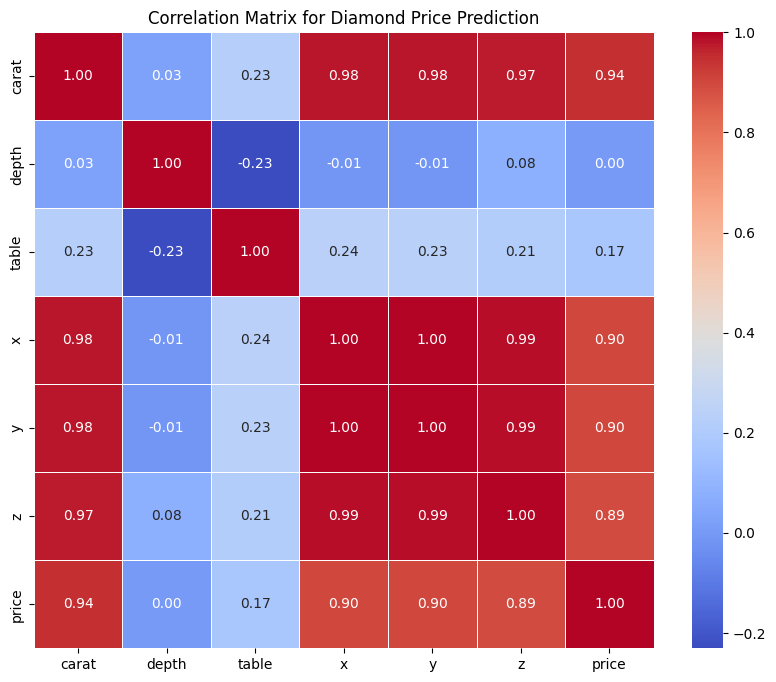

In [14]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Diamond Price Prediction')
plt.show()

### **Interpreting the Correlation Matrix**
For diamond price prediction, you'd be most interested in the correlation of each numerical feature with **`price`**:

- **Price and Carat**: Expect a **strong positive correlation**, as larger diamonds (higher carat) are typically more expensive.
- **Price and Dimensions (x, y, z)**: There may be a moderate positive correlation since larger physical dimensions generally correlate with higher carat and price.
- **Price and Depth, Table**: The correlation might be weaker or insignificant. These features don't directly affect the price but might have an indirect impact based on specific diamond standards.
- **Carat and Dimensions (x, y, z)**: These could show strong correlations, as they all relate to the physical size of the diamond.

### **Summary Insights**
- **Strong Correlations**: `carat`, `x`, `y`, `z` with `price`.
- **Weak Correlations**: `depth`, `table` with `price`.
- **Action**: Focus on features like `carat` and dimensions for price prediction models. Consider handling multicollinearity if features are highly correlated.

columns `x, y, and z` in dataset are highly correlated with each other, they could raise **multicollinearity** issues, especially in `linear regression` models. Multicollinearity occurs when two or more predictor variables in a model are highly correlated, which can make it difficult to estimate the relationship between each predictor and the target variable accurately.

---
---

### Skewness and Normality Test
- Check if the data is skewed and assess normality using a Q-Q plot.

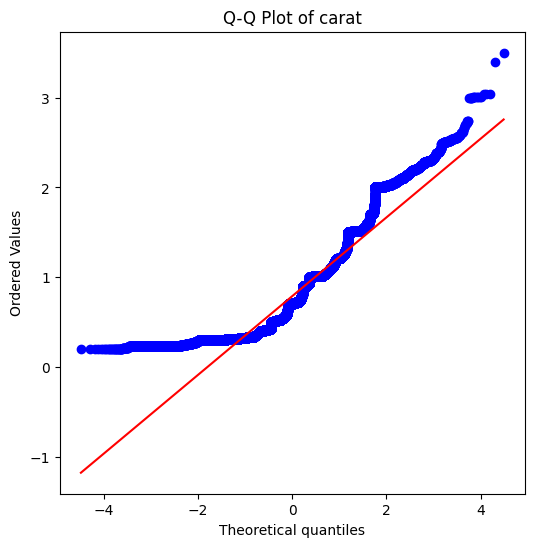

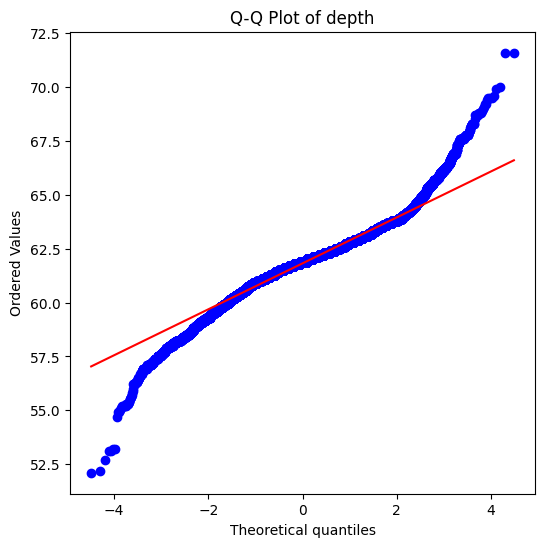

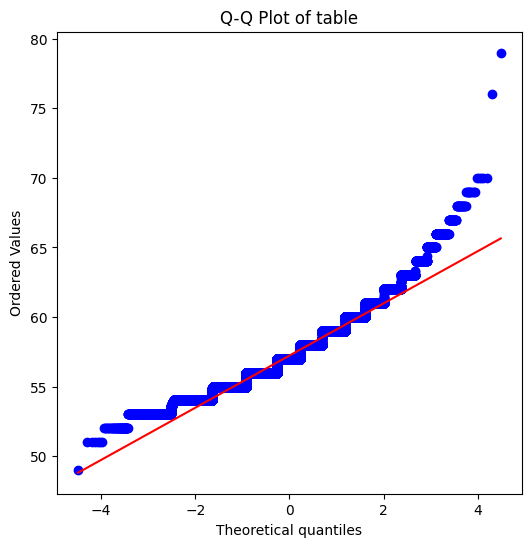

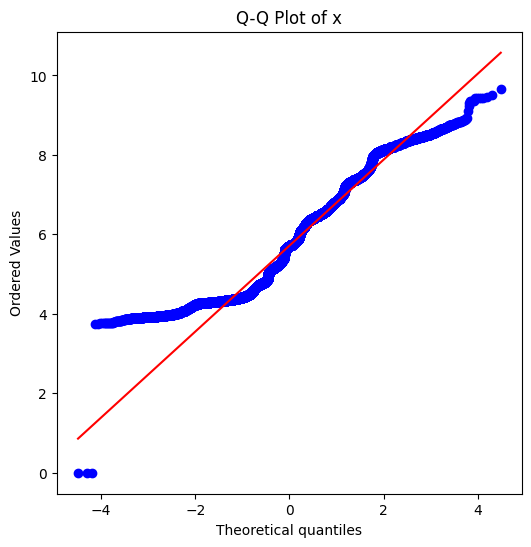

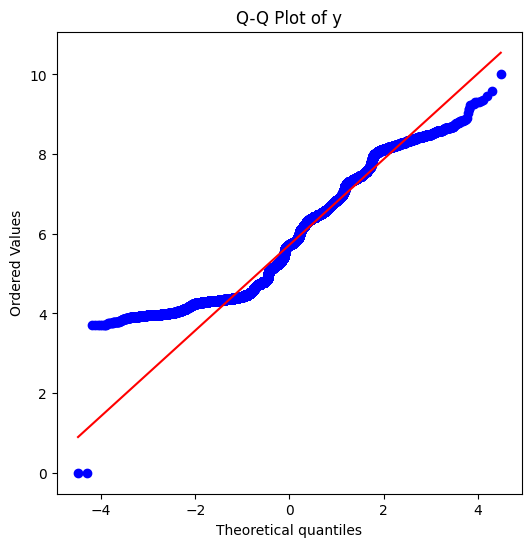

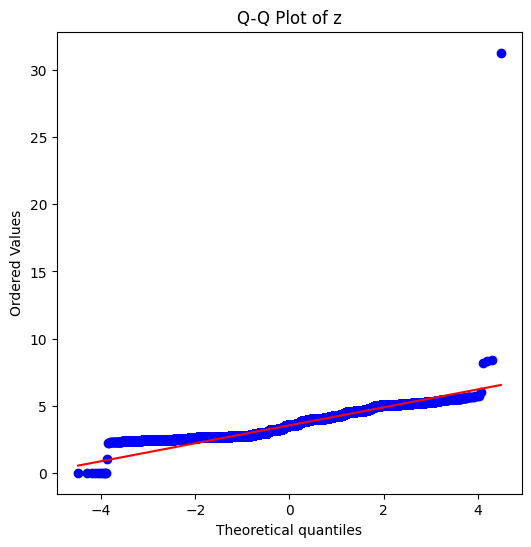

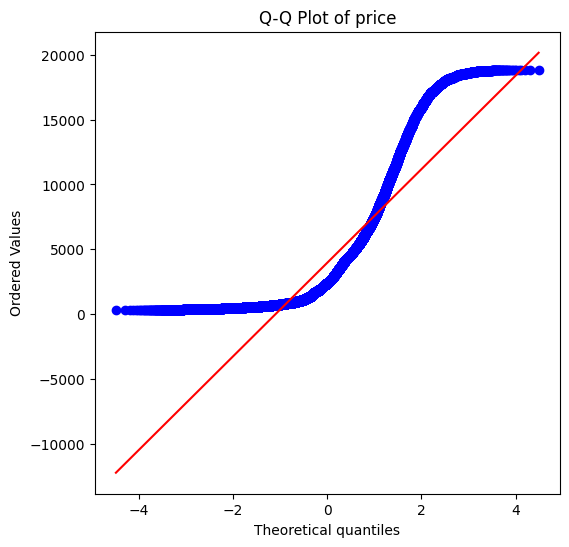

In [15]:
import scipy.stats as stats

for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.show()

The **Q-Q plot** helps assess if the data is normally distributed. For the diamond dataset:

- **Price** and **Carat** will show's **right-skewed distributions**, as most diamonds are low-priced and smaller in carat.
- **Depth** and **Table** appear closer to normal.
- **x, y, z (dimensions)** show's slight skewness or normal distribution.

**Action**: Apply **log transformations** to skewed data (like `price` and `carat`) for better model performance, while normal or near-normal features can be used directly.

---
---

## Pairplot Key insights 

<Figure size 1200x800 with 0 Axes>

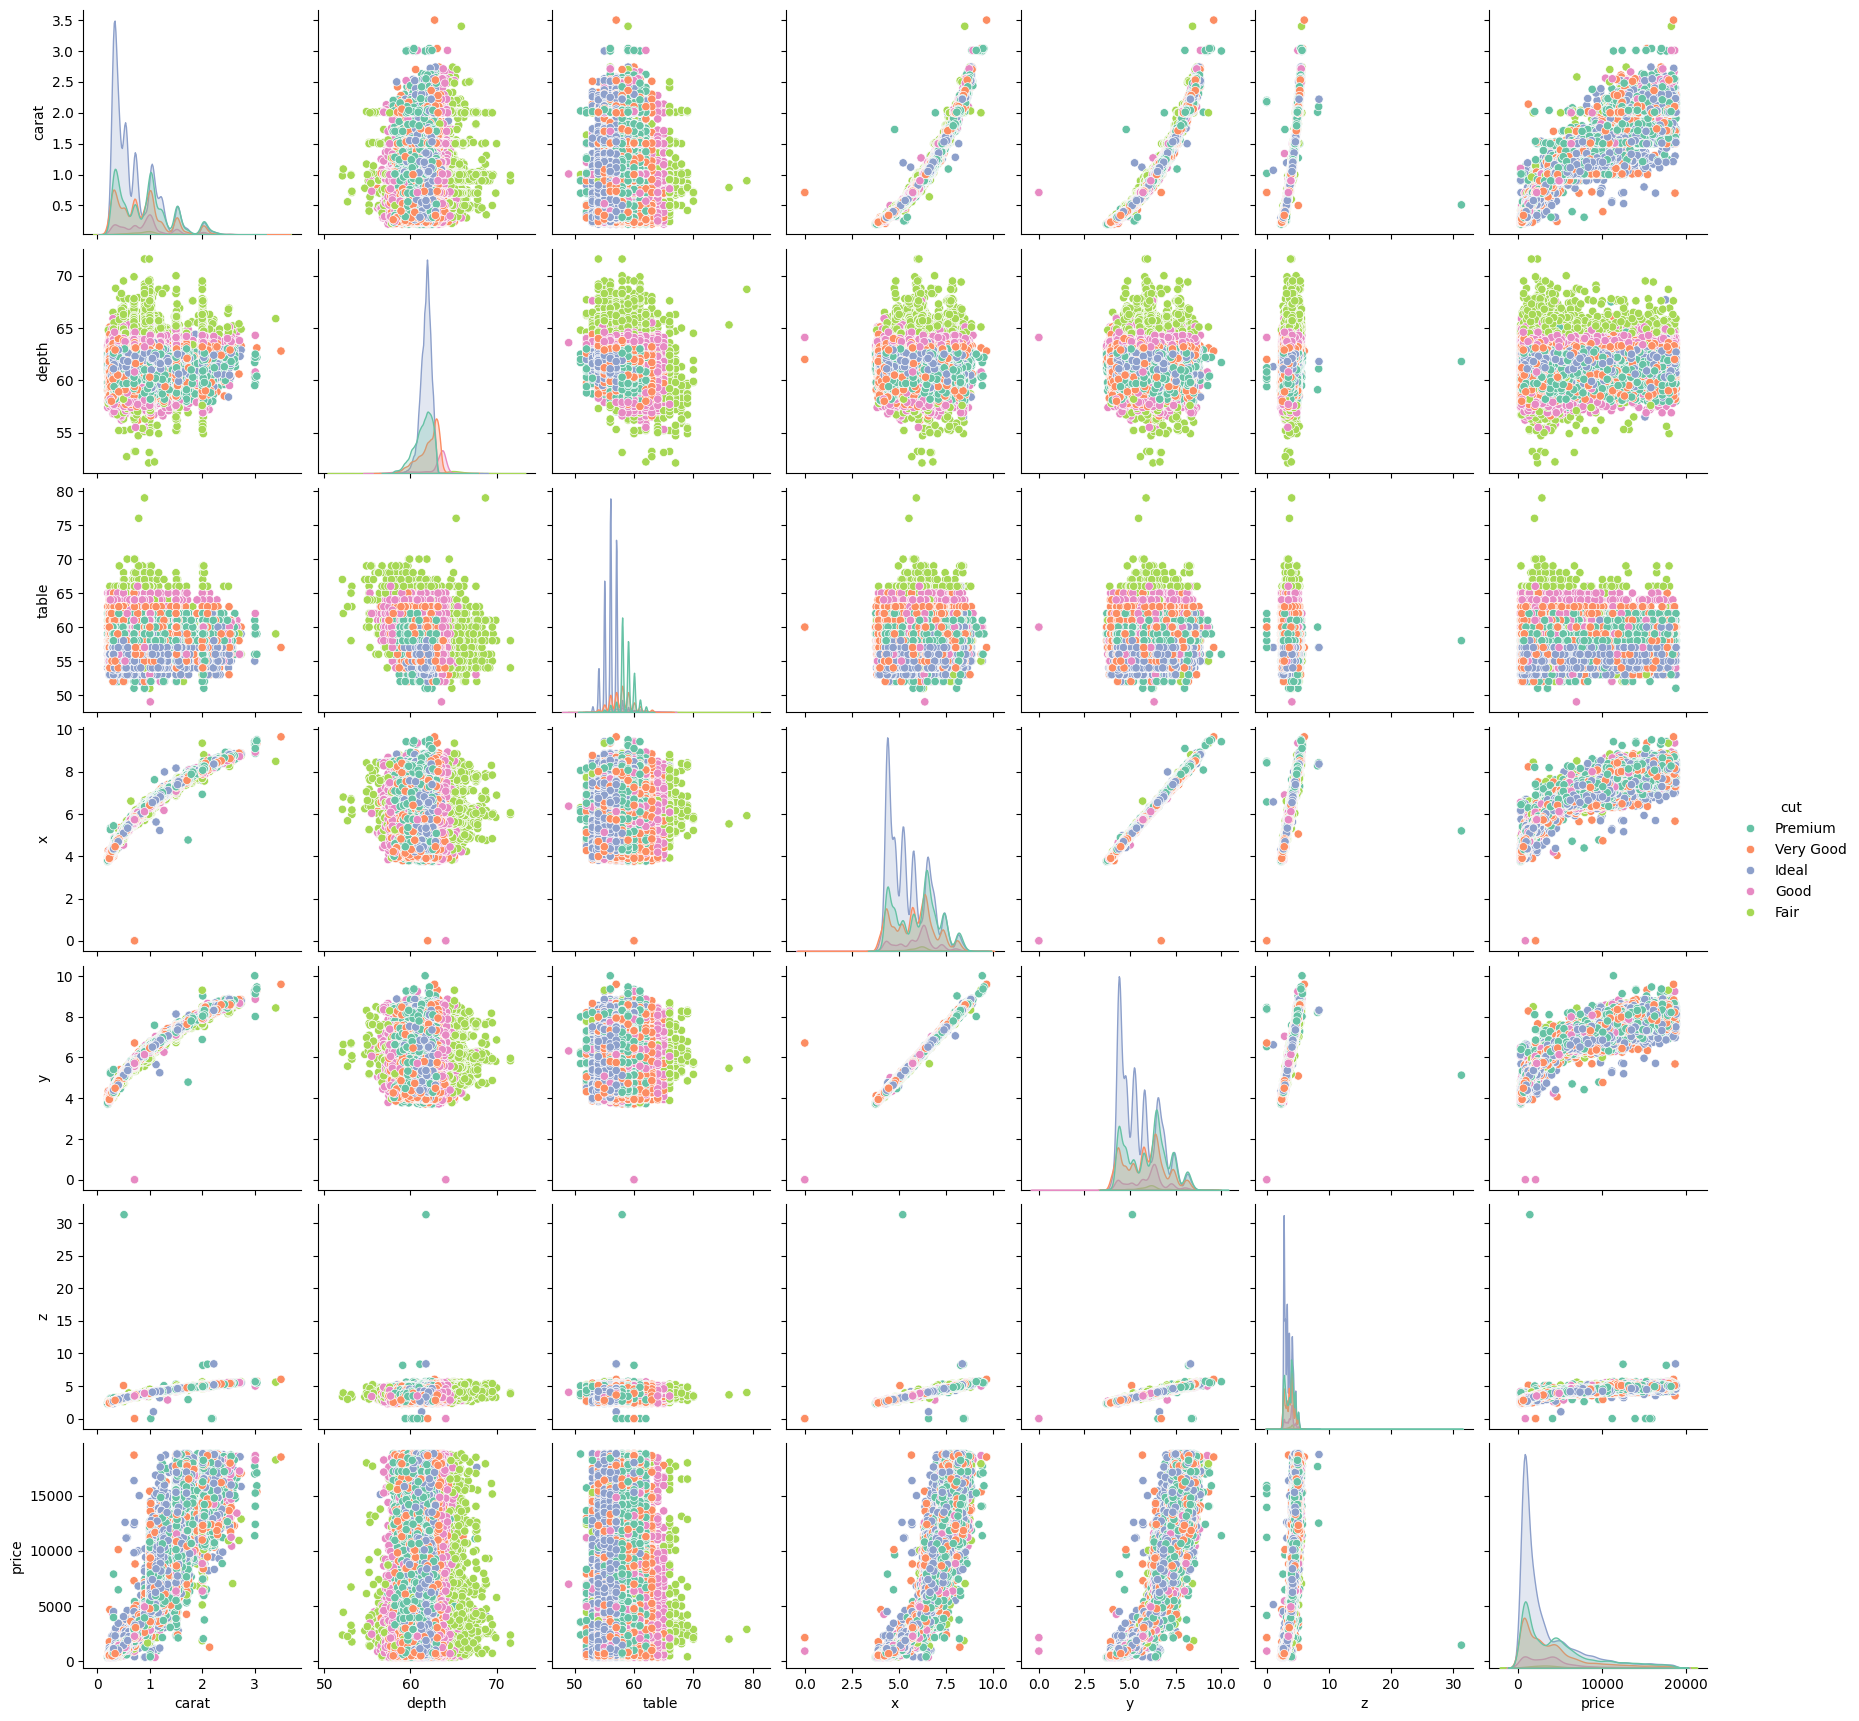

In [16]:
# Select the numeric features for pair plot
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot pairplot with hue based on a categorical variable (e.g., 'cut', 'color', or 'clarity')
sns.pairplot(df, vars=numeric_features, hue='cut', palette='Set2')

# Show the plot
plt.show()

### Summary of Key Insights:
- **Carat** shows a strong positive correlation with **price**; as carat size increases, price generally increases.
- **Depth** and **table** show weak or no significant correlation with **price**, suggesting that these features alone are less important in determining the price.
- **X**, **Y**, and **Z** are highly correlated with each other, reflecting the physical size of the diamond. However, their direct relationship with **price** may not be as strong.
- There are likely **outliers** in the dataset, such as diamonds with very large carat sizes priced unusually low or very small carat diamonds with high prices.
- **Multicollinearity** may be an issue between the dimensions (`x`, `y`, `z`), which should be considered when building predictive models.

These observations from the **pairplot** can guide your decisions on feature selection, identifying which features are most important for predicting diamond prices, and recognizing any issues such as multicollinearity or outliers.

## EDA Categorical Features

In [17]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


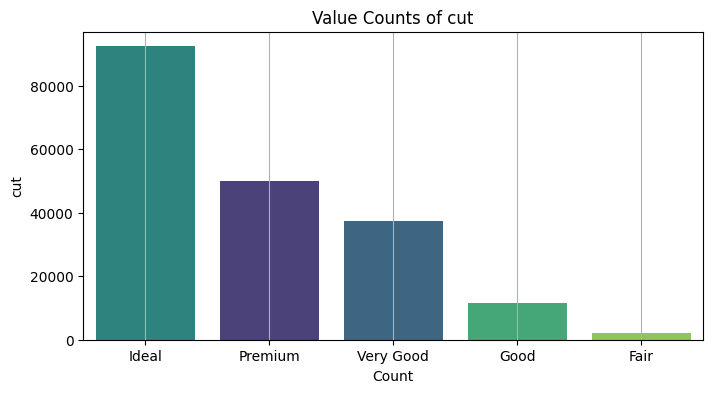

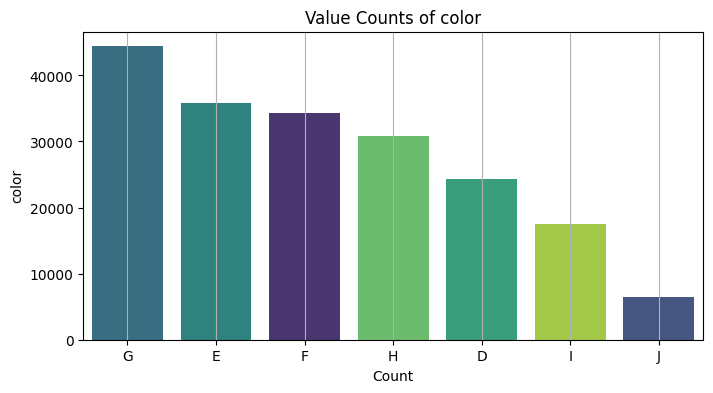

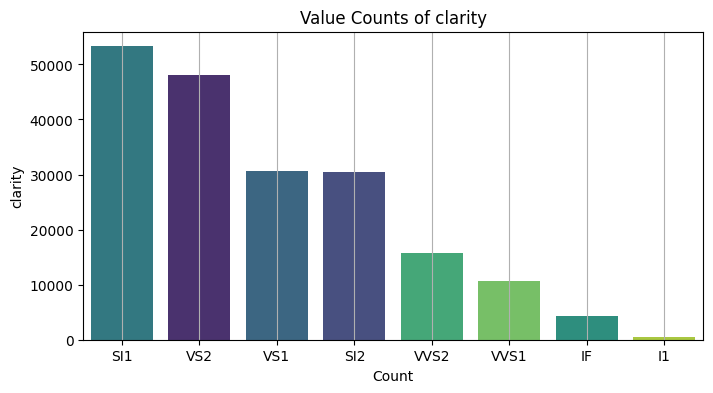

In [ ]:
# Plot value counts for categorical columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], hue=df[col], palette="viridis", order=df[col].value_counts().index)
    plt.title(f"Value Counts of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.grid(axis='x')
    plt.show()

---
---

The data you provided shows summary statistics for the categorical columns `cut`, `color`, and `clarity` in your diamond dataset. Here's a breakdown of the meaning of each piece of information in the context of predicting diamond prices:

### 1. **Cut**
- **Count**: 193,573 — There are 193,573 diamonds in the dataset with information on the cut.
- **Unique**: 5 — The `cut` variable has 5 unique values (e.g., "Fair", "Good", "Very Good", "Ideal", "Excellent").
- **Top**: "Ideal" — The most frequent category in the `cut` variable is "Ideal".
- **Freq**: 92,454 — "Ideal" appears 92,454 times in the dataset, making it the most common cut.

### 2. **Color**
- **Count**: 193,573 — There are 193,573 diamonds in the dataset with information on the color.
- **Unique**: 7 — The `color` variable has 7 unique values (e.g., "D", "E", "F", "G", "H", "I", "J").
- **Top**: "G" — The most frequent category in the `color` variable is "G".
- **Freq**: 44,391 — "G" appears 44,391 times in the dataset, making it the most common color.

### 3. **Clarity**
- **Count**: 193,573 — There are 193,573 diamonds in the dataset with clarity information.
- **Unique**: 8 — The `clarity` variable has 8 unique values (e.g., "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1").
- **Top**: "SI1" — The most frequent category in the `clarity` variable is "SI1" (Slightly Included 1).
- **Freq**: 53,272 — "SI1" appears 53,272 times in the dataset, making it the most common clarity.

---
---
### **Bar-Plots** Price Vs Categorical Features

Text(0.5, 1.0, 'Price vs Cut')

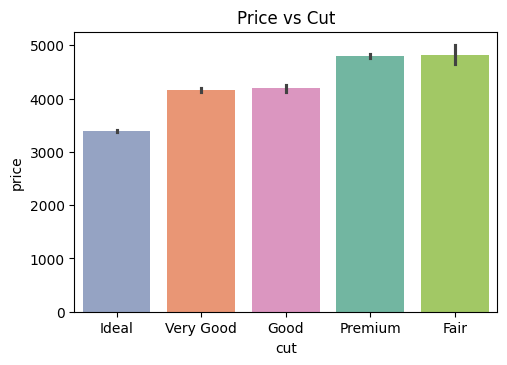

In [19]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Arrange categories for 'cut' based on average price
cut_order = df.groupby('cut')['price'].mean().sort_values().index

# Plot: Price vs Cut
plt.subplot(2, 2, 1)  # Creates a 2x2 grid, and this is the first subplot
sns.barplot(x='cut', y='price', data=df, palette='Set2', hue='cut', order=cut_order)
plt.title('Price vs Cut')

Text(0.5, 1.0, 'Price vs Color')

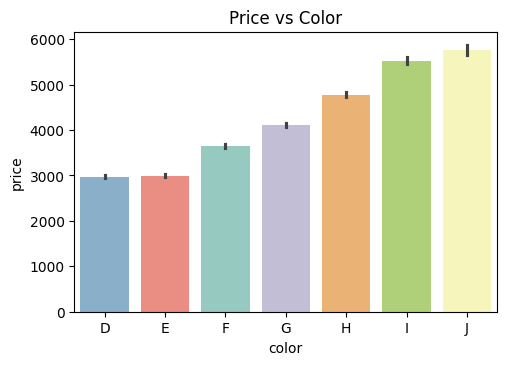

In [20]:
plt.figure(figsize=(12, 8))
# Arrange categories for 'color' based on average price
color_order = df.groupby('color')['price'].mean().sort_values().index

# Plot: Price vs Color
plt.subplot(2, 2, 2)  # This is the second subplot
sns.barplot(x='color', y='price', data=df, palette='Set3', hue='color', order=color_order)
plt.title('Price vs Color')

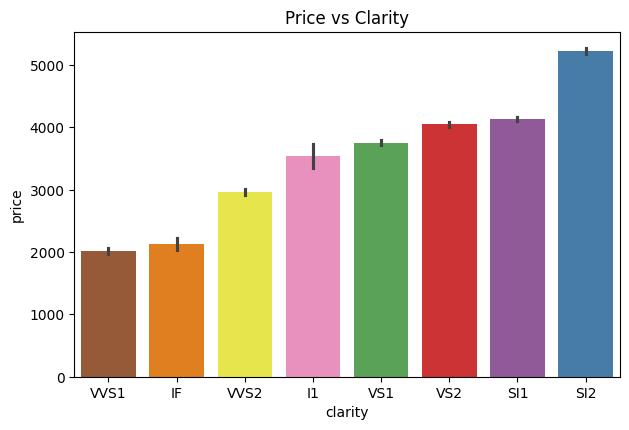

In [21]:
plt.figure(figsize=(12, 8))
# Arrange categories for 'clarity' based on average price
clarity_order = df.groupby('clarity')['price'].mean().sort_values().index

# Plot: Price vs Clarity
plt.subplot(2, 2, 3)  # This is the third subplot
sns.barplot(x='clarity', y='price', data=df, palette='Set1', hue='clarity', order=clarity_order)
plt.title('Price vs Clarity')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

---
---

### **Summary of Insights:**
- **Cut**: Diamonds with higher-quality cuts (Ideal, Excellent) generally have higher prices.
- **Color**: Colorless diamonds (D, E, F) tend to be more expensive than diamonds with more color (N, O, P).
- **Clarity**: Diamonds with fewer inclusions (FL, IF) have higher prices than those with visible flaws (I1, SI1).

The bar plots, by displaying the **average price** for each category, provide a simple yet powerful way to understand how these characteristics impact the price of diamonds.

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [23]:
## Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

### Convert categorical Data to numerical using **(OHE or Lable encoding)**

In [24]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [25]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [26]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [27]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [28]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [29]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


## Model Training 

In [31]:
import numpy as np

## Import Necessory models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

## Data preprocessing and feature scalling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Metriics to check the accuracy of data
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



### Split the data in to **Train-Test** 

In [32]:
X = df.drop(['price'], axis=1)
y = df['price']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,5,2,6,60.6,56.0,4.85,4.80,2.93
95284,1.23,3,5,5,59.9,59.0,6.91,7.01,4.19
184777,1.70,4,5,4,62.0,58.0,7.61,7.66,4.74
5419,0.33,5,3,7,61.2,56.0,4.47,4.44,2.73
45466,0.33,3,6,3,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,3,2,3,60.2,61.0,5.11,5.15,3.09
103694,1.91,3,3,3,62.3,62.0,7.85,7.79,4.87
131932,1.22,4,4,4,62.8,58.0,6.82,6.74,4.26
146867,0.31,3,4,7,61.1,56.0,4.37,4.40,2.67


## Model Training Part

### 1. Linear Regression

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

#### Testing Data Evaluation

In [36]:
## Testing Data Evaluation
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

LR_r2score = r2_score(y_test,y_pred)
print("R_2Score :",LR_r2score)

MSE : 1029473.3531156897
RMSE : 1014.6296630375488
MAE : 675.0758270067437
R_2Score : 0.9362906819996045


### 1.1 Lasso 

In [37]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)

Lasso()

#### Testing Data Evaluation

In [38]:
## Testing Data Evaluation
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

Lasso_r2score = r2_score(y_test,y_pred)
print("R_2Score :",Lasso_r2score)

MSE : 1029863.8587308393
RMSE : 1014.8220823035136
MAE : 677.2584210451422
R_2Score : 0.9362665154232271


### 1.2 Ridge Regression

In [39]:
Ridge_model = Ridge(alpha=1.0)  
Ridge_model.fit(X_train, y_train)

Ridge()

#### Testing Data Evaluation

In [40]:
## Testing Data Evaluation
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

Ridge_r2score = r2_score(y_test,y_pred)
print("R_2Score :",Ridge_r2score)

MSE : 1029863.8587308393
RMSE : 1014.8220823035136
MAE : 677.2584210451422
R_2Score : 0.9362665154232271


### 2. DecisionTreeRegressor

In [41]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

#### Testing Data Evaluation

In [42]:
## Testing Data Evaluation
y_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

DT_r2score = r2_score(y_test,y_pred)
print("R_2Score :",DT_r2score)

MSE : 720034.8586156457
RMSE : 848.5486778115005
MAE : 426.4572111631537
R_2Score : 0.9554403913029123


### 3. RandomForestRegressor

In [43]:
Rf_model = RandomForestRegressor()
Rf_model.fit(X_train,y_train)

RandomForestRegressor()

#### Testing Data Evaluation

In [44]:
## Testing Data Evaluation
y_pred = Rf_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

RF_r2score = r2_score(y_test,y_pred)
print("R_2Score :",RF_r2score)

MSE : 374447.2983716667
RMSE : 611.9209903015802
MAE : 310.00557486881365
R_2Score : 0.9768271981648187


### 4. AdaBoostRegressor

In [45]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train,y_train)

AdaBoostRegressor()

#### Testing Data Evaluation

In [46]:
## Testing Data Evaluation
y_pred = ada_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

ada_r2score = r2_score(y_test,y_pred)
print("R_2Score :",ada_r2score)

MSE : 2524464.0395730515
RMSE : 1588.8562048130887
MAE : 1142.4652483100167
R_2Score : 0.8437726612437644


### Feature Scaling
- As we are using some distance base algotihms, feature scaling becomes compulsory
- we have Outliers in our data set as well 

In [47]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(X_train) # Saving the Min and Max

normalized_array = normal_scalar.transform(X_train)
x_train = pd.DataFrame(normalized_array,columns=X.columns)
x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.063636,1.00,0.166667,0.714286,0.435897,0.333333,0.502591,0.479520,0.093610
1,0.312121,0.50,0.666667,0.571429,0.400000,0.476190,0.716062,0.700300,0.133866
2,0.454545,0.75,0.666667,0.428571,0.507692,0.428571,0.788601,0.765235,0.151438
3,0.039394,1.00,0.333333,0.857143,0.466667,0.333333,0.463212,0.443556,0.087220
4,0.039394,0.50,0.833333,0.285714,0.512821,0.428571,0.456995,0.444555,0.087859


### 5. KNeighborsRegressor

In [48]:
Knn_model = KNeighborsRegressor()
Knn_model.fit(X_train,y_train)

KNeighborsRegressor()

#### Testing Data Evaluation

In [49]:
normalized_array = normal_scalar.transform(X_test)
x_test = pd.DataFrame(normalized_array,columns=X.columns)
x_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.090909,1.00,0.000000,0.285714,0.512821,0.380952,0.523316,0.507493,0.100319
1,0.545455,0.50,0.500000,0.142857,0.379487,0.380952,0.837306,0.814186,0.156230
2,0.021212,0.75,0.166667,0.857143,0.430769,0.476190,0.434197,0.415584,0.080511
3,0.036364,0.75,0.833333,0.857143,0.466667,0.476190,0.459067,0.443556,0.086581
4,0.300000,1.00,0.666667,0.285714,0.533333,0.333333,0.701554,0.680320,0.135144


In [50]:
## Testing Data Evaluation
y_pred = Knn_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

KNN_r2score = r2_score(y_test,y_pred)
print("R_2Score :",KNN_r2score)

MSE : 513996.6090604766
RMSE : 716.9355682768687
MAE : 377.99734123157464
R_2Score : 0.9681911403353449


### Compare the performance of different model

In [51]:
models=pd.DataFrame({'Model':['Linear Regression','Lasso','Ridge','Decison Tree','Random Forest','AdaBoost','KNN'],
                     'Score':[LR_r2score,Lasso_r2score,Ridge_r2score,DT_r2score,RF_r2score,ada_r2score,KNN_r2score]
                    })

In [52]:
## Model Testing Performance
models

,Model,Score
0,Linear Regression,0.936291
1,Lasso,0.936267
2,Ridge,0.936267
3,Decison Tree,0.955440
4,Random Forest,0.976827
5,AdaBoost,0.843773
6,KNN,0.968191


### Plot the Graph of Metric R2_Score 

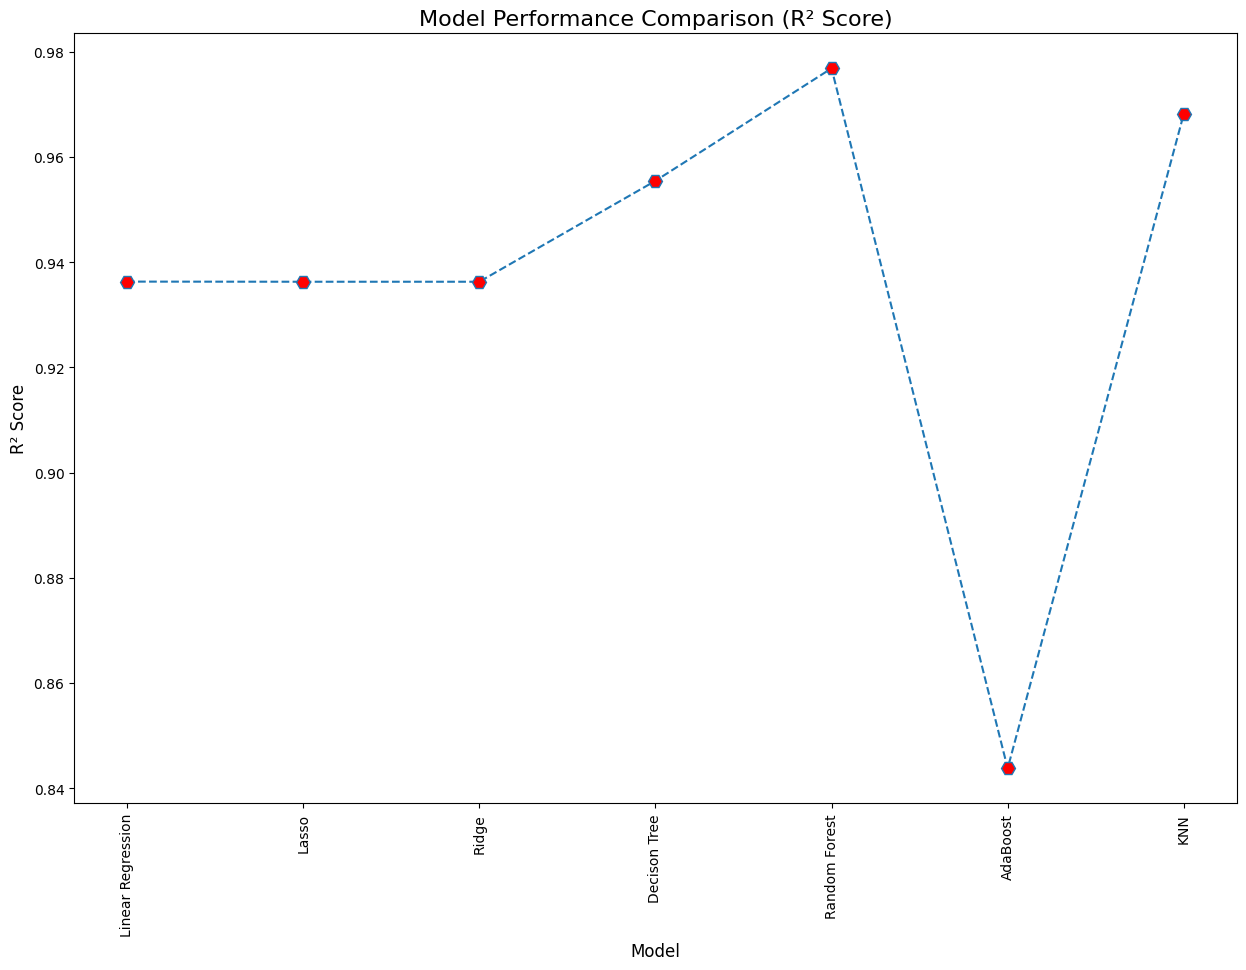

In [53]:
fig = plt.figure(figsize=(15,10))
plt.plot(models.Model,models.Score, linestyle = 'dashed',marker='H',mfc = 'r',ms = 10)
plt.title('Model Performance Comparison (R² Score)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=90)
plt.show()